<a href="https://colab.research.google.com/github/Aynahd/Freshman/blob/main/Explore_Airplanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F985493%2F1664328%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240420%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240420T095142Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8470726d513c935902bfda342d52a7787725391a85e2b40fd1f7615e9c2e5650d544a038669acef52cf2e9c99acdb4dc6373a367855526fd52b86f111d5244844a8b058d97d7ac41308693e667ccb583de5d743e4f53dd3ca8877036630ade02f2af52d87dcaba4d81d1abaf66dabc54daa1c6b6bf4f65112f9afe7187b2b8b0e77a9e1fe387261a05c54dbf9a3f9818447c213a1786928f0d7f73b5774f4dd8a08724d476315ff764979a9fda7a1f6f4272f881a2abc4f98f4086b613f14b76f8f67b59451e64a7800b44534b412c80f5645eca189ead7ed0b1b51ed43756f4d2abfeae9dce06a348c0554c9e74b1a6d5dd46afa7d7b173c9bddf9c2408b4e5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12895593 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_109.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_271.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_184.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_429.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_257.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_628.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/428452.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_005.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_290.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_177.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_643.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_611.csv
/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/airplane_363.csv
/kaggle/input/Airplanes_Annotat

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 428492.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/428492.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '428492.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1 rows and 1 columns


In [ ]:
df1.head(5)

,1
0,106 110 144 148


In [ ]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 428452.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/428452.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = '428452.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 0 rows and 1 columns


In [ ]:
df2.head(5)

,0


In [ ]:
plotPerColumnDistribution(df2, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 42849.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/kaggle/input/Airplanes_Annotations/Airplanes_Annotations/42849.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = '42849.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 6 rows and 1 columns


In [ ]:
df3.head(5)

,6
0,149 110 187 149
1,186 189 202 209
2,68 61 94 94
3,115 75 149 111
4,193 138 230 175


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCol = len(df.columns)
    nGraphRow = 2  # Define the number of rows in the plot

    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
nGraphRow = 2

Distribution graphs (histogram/bar graph) of sampled columns:

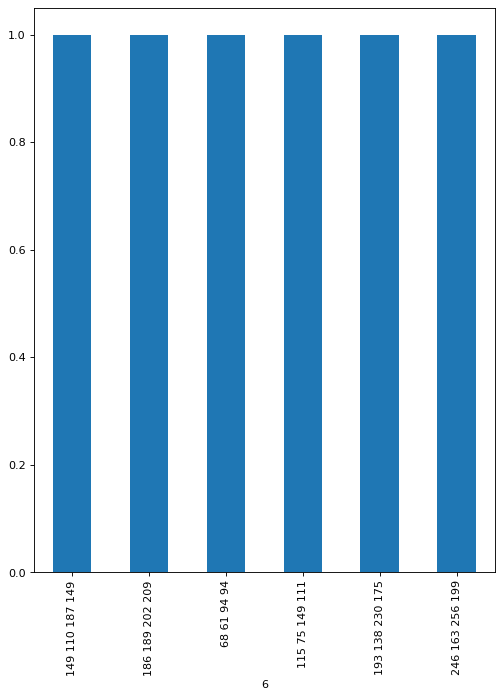

In [ ]:
plotPerColumnDistribution(df3, 10, 5)